In [4]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import matplotlib
import os
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("darkgrid")

In [12]:
pd.set_option('display.max_rows', None)

In [16]:
def read_results(files_dir):
    frames = []
    for filename in os.listdir(files_dir):
        if '.csv' in filename and 'example' not in filename:
            try:
                label = filename.split('.csv')[0]
            except:
                continue
            
            df_current = pd.read_csv(files_dir + filename)
            df_current['label'] = label
            frames.append(df_current)

    result_df = pd.concat(frames)
    return result_df

In [48]:
# Switch the dataset setting below
# dataset = "yelp"
dataset = "ml10"
metrics = ["HR@5", "HR@10"]

experiment_results_dir = "../tables/{}_experiment_results/".format(dataset)
figure_dir = './experiment_figures/{}/'.format(dataset)
if not os.path.exists(figure_dir):
    os.makedirs(figure_dir)

# Exp 1. Critiquing-only Performance

In [25]:
current_results_dir = experiment_results_dir + 'Exp1_Pure_Critique/'
current_results_df = read_results(current_results_dir)

In [26]:
current_results_df.head()

,HR@1,HR@5,HR@10,HR@15,HR@20,Steps,HR@1_CI,HR@5_CI,HR@10_CI,HR@15_CI,HR@20_CI,label
0,0.0102,0.0556,0.1038,0.1488,0.1898,0,0.002785,0.006352,0.008454,0.009865,0.010870,BK-expert
1,0.0220,0.0866,0.1588,0.2088,0.2582,1,0.004066,0.007796,0.010131,0.011266,0.012131,BK-expert
2,0.0264,0.1050,0.1842,0.2418,0.2946,2,0.004444,0.008497,0.010745,0.011868,0.012636,BK-expert
3,0.0262,0.1126,0.1908,0.2530,0.3056,3,0.004427,0.008762,0.010892,0.012050,0.012769,BK-expert
4,0.0284,0.1150,0.1972,0.2634,0.3126,4,0.004604,0.008843,0.011029,0.012209,0.012849,BK-expert


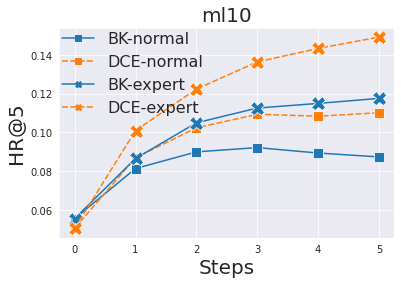

Saving figure to ./experiment_figures/ml10/Exp1_Pure_Critique_HR@5.pdf


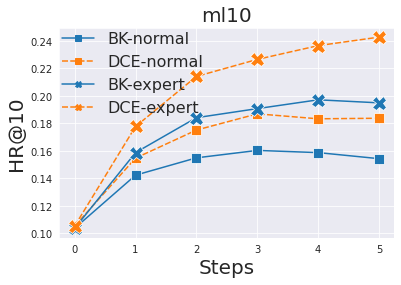

Saving figure to ./experiment_figures/ml10/Exp1_Pure_Critique_HR@10.pdf


In [27]:
for metric in metrics:
    df_current_normal = current_results_df[current_results_df['label'].str.contains('-normal')]
    df_current_expert = current_results_df[current_results_df['label'].str.contains('-expert')]
    df_plot_normal= df_current_normal.pivot("Steps", "label", metric)
    df_plot_expert = df_current_expert.pivot("Steps", "label", metric)

    plt.figure()
    plot = sns.lineplot(data=df_plot_normal, markers=['s', 's'],markersize=10)
    plot = sns.lineplot(data=df_plot_expert, markers=['X', 'X'], markersize=14)
    plot.set_title(dataset, fontsize=20)
    plot.set_xlabel("Steps", fontsize = 20)
    plt.subplots_adjust(bottom=0.15)
    plot.set_ylabel(metric, fontsize=20)
    plot.legend_.set_title(None)
    plt.legend(fontsize = 16, loc='upper left', bbox_to_anchor=(-0.035, 1.05), frameon=False)
    plt.show()
    
    save_figure_path = figure_dir + 'Exp1_Pure_Critique_{}.pdf'.format(metric)
    print('Saving figure to', save_figure_path)
    plot.figure.savefig(save_figure_path)

# Exp2. Clarification-critiquing Performance

In [49]:
current_results_dir = experiment_results_dir + 'Exp2_Clarification_Critique/'
current_results_df = read_results(current_results_dir)

In [50]:
current_results_df

,HR@1,HR@5,HR@10,HR@15,HR@20,Steps,HR@1_CI,HR@5_CI,HR@10_CI,HR@15_CI,HR@20_CI,label
0,0.0102,0.0556,0.1038,0.1488,0.1898,0,0.002785,0.006352,0.008454,0.009865,0.010870,BK-NN
1,0.0236,0.0998,0.1668,0.2260,0.2656,1,0.004208,0.008308,0.010333,0.011593,0.012242,BK-NN
2,0.0278,0.1078,0.1728,0.2348,0.2794,2,0.004557,0.008596,0.010480,0.011749,0.012437,BK-NN
3,0.0250,0.1040,0.1770,0.2382,0.2810,3,0.004328,0.008461,0.010579,0.011808,0.012459,BK-NN
4,0.0252,0.1060,0.1754,0.2332,0.2830,4,0.004344,0.008533,0.010542,0.011721,0.012486,BK-NN
5,0.0242,0.1014,0.1698,0.2254,0.2700,5,0.004260,0.008367,0.010407,0.011582,0.012306,BK-NN
0,0.0100,0.0506,0.1054,0.1476,0.1942,0,0.002758,0.006075,0.008511,0.009832,0.010965,DCE-Tree
1,0.0258,0.1024,0.1800,0.2410,0.2892,1,0.004394,0.008404,0.010649,0.011855,0.012567,DCE-Tree
2,0.0320,0.1142,0.1978,0.2616,0.3136,2,0.004878,0.008816,0.011041,0.012182,0.012860,DCE-Tree
3,0.0330,0.1278,0.2140,0.2764,0.3262,3,0.004952,0.009254,0.011368,0.012396,0.012995,DCE-Tree


Saving figure to ./experiment_figures/ml10/Exp2_Clarification_Critique_HR@5.pdf
Saving figure to ./experiment_figures/ml10/Exp2_Clarification_Critique_HR@10.pdf


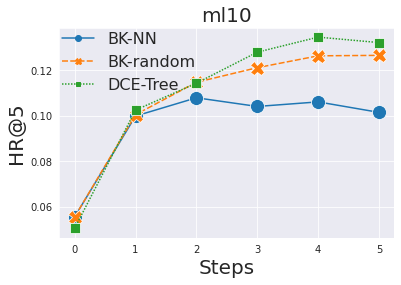

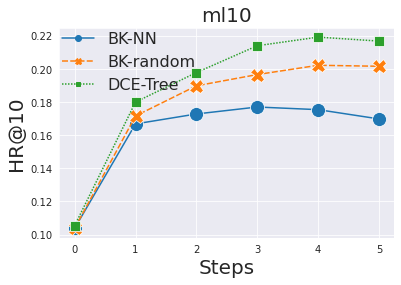

In [51]:
for metric in metrics:
    df_current = current_results_df.copy()
    df_plot= df_current.pivot("Steps", "label", metric)

    plt.figure()
    plot = sns.lineplot(data=df_plot, markers=True, markersize=14)
    plot.set_title(dataset, fontsize=20)
    plot.set_xlabel("Steps", fontsize = 20)
    plt.subplots_adjust(bottom=0.15)
    plot.set_ylabel(metric, fontsize=20)
    plot.legend_.set_title(None)
    plt.legend(fontsize = 16, loc='upper left', bbox_to_anchor=(-0.035, 1.05), frameon=False)
    
    save_figure_path = figure_dir + 'Exp2_Clarification_Critique_{}.pdf'.format(metric)
    print('Saving figure to', save_figure_path)
    plot.figure.savefig(save_figure_path)

# Exp3. Clarification Performance

In [52]:
current_results_dir = experiment_results_dir + 'Exp3_Clarification_Performance/'
current_results_df = read_results(current_results_dir)

In [53]:
current_results_df

,HR@1,HR@5,HR@10,HR@15,HR@20,Steps,HR@1_CI,HR@5_CI,HR@10_CI,HR@15_CI,HR@20_CI,label
0,0.006,0.036,0.092,0.142,0.200,0,0.006769,0.016329,0.025334,0.030596,0.035062,distributional
1,0.004,0.032,0.096,0.146,0.200,1,0.005533,0.015427,0.025822,0.030951,0.035062,distributional
2,0.010,0.074,0.154,0.208,0.256,2,0.008721,0.022945,0.031639,0.035577,0.038254,distributional
3,0.018,0.104,0.186,0.250,0.312,3,0.011654,0.026757,0.034107,0.037955,0.040611,distributional
4,0.024,0.120,0.202,0.262,0.312,4,0.013415,0.028484,0.035192,0.038543,0.040611,distributional
5,0.036,0.120,0.206,0.280,0.326,5,0.016329,0.028484,0.035450,0.039356,0.041088,distributional
0,0.006,0.036,0.092,0.142,0.200,0,0.006769,0.016329,0.025334,0.030596,0.035062,normal
1,0.004,0.032,0.094,0.144,0.186,1,0.005533,0.015427,0.025580,0.030774,0.034107,normal
2,0.008,0.064,0.128,0.178,0.238,2,0.007809,0.021454,0.029284,0.033529,0.037328,normal
3,0.010,0.060,0.126,0.186,0.224,3,0.008721,0.020817,0.029088,0.034107,0.036545,normal


In [54]:
map_dict = {
    'normal': 'without clarification',
    'distributional': 'personalized clarification',
    'distributionalNoUserEmbed': 'non-personalized clarification',
}

Saving figure to ./experiment_figures/ml10/Exp3_Clarification_Performance_HR@5.pdf
Saving figure to ./experiment_figures/ml10/Exp3_Clarification_Performance_HR@10.pdf


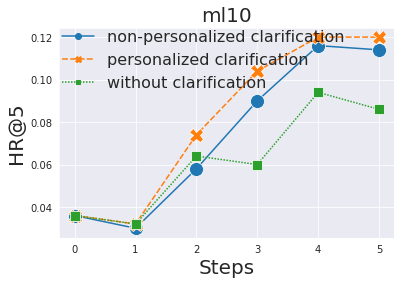

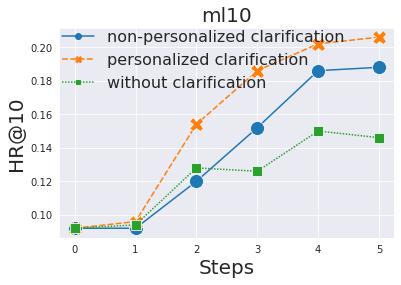

In [55]:
for metric in metrics:
    df_current = current_results_df.copy()
    df_current['label'] = df_current['label'].apply(lambda x: map_dict[x])
    df_plot= df_current.pivot("Steps", "label", metric)

    plt.figure()
    plot = sns.lineplot(data=df_plot, markers=True, markersize=14)
    plot.set_title(dataset, fontsize=20)
    plot.set_xlabel("Steps", fontsize = 20)
    plt.subplots_adjust(bottom=0.15)
    plot.set_ylabel(metric, fontsize=20)
    plot.legend_.set_title(None)
    plt.legend(fontsize = 16, loc='upper left', bbox_to_anchor=(-0.035, 1.06), frameon=False)
    
    save_figure_path = figure_dir + 'Exp3_Clarification_Performance_{}.pdf'.format(metric)
    print('Saving figure to', save_figure_path)
    plot.figure.savefig(save_figure_path)